<a href="https://colab.research.google.com/github/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/blob/main/Credit_Default_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data2 = 'https://raw.githubusercontent.com/AndreiAf02/Transfer_Learning_Fine_Tuning_Update/main/'

In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [4]:
data_orig = pd.read_csv(path_to_data2 + "Credit_Imbalanced_Fine_Tuning_5_20.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2 + "Credit_SRS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2 + "Credit_SRSwR_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2 + "Credit_Sy_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2 + "Credit_Sy_multi_Fine_Tuning_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2 + "Credit_SRS_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2 + "Credit_Sy_ROS_Fine_Tuning_Extension.csv", sep=",", header=0)

# data_orig

Original (imbalanced) data performance:

In [5]:
data_orig

,Unnamed: 0,FPR,FNR
0,0,0.059406,0.700441
1,1,0.067893,0.687225
2,2,0.069307,0.687225
3,3,0.057992,0.704846
4,4,0.048091,0.740088
...,...,...,...
95,95,0.084866,0.669604
96,96,0.089109,0.656388
97,97,0.080622,0.678414
98,98,0.083451,0.674009


Error type: FPR
Mean: 0.07217821782178213
Variance: 0.00025019495281514446
Variance of estimate: 2.5019495281514446e-06
Standard error: 0.0015817552048757243
95% Confidence Interval:  [ 0.06907797762022572 ,  0.07527845802333855 ]
-----------------------------
Error type: FNR
Mean: 0.6823348017621145
Variance: 0.0012815750903041564
Variance of estimate: 1.2815750903041564e-05
Standard error: 0.003579909342852353
95% Confidence Interval:  [ 0.6753181794501238 ,  0.6893514240741051 ]
-----------------------------


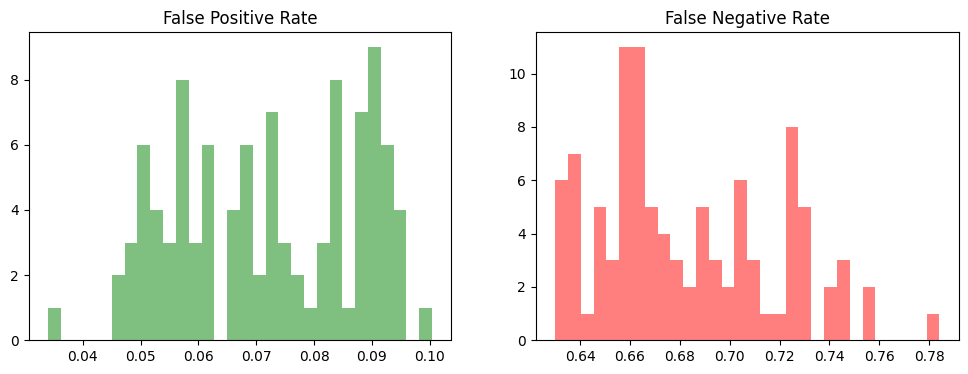

In [6]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Undersampling (RUS):

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.12939886845827434
Variance: 7.397163591645895e-05
Variance of estimate: 3.698581795822948e-07
Standard error: 0.0006081596661916135
95% Confidence Interval:  [ 0.12820687551253876 ,  0.1305908614040099 ]
-----------------------------
Error type: FNR
Mean: 0.5746696035242291
Variance: 0.00016749118489261681
Variance of estimate: 8.37455924463084e-07
Standard error: 0.0009151261795310437
95% Confidence Interval:  [ 0.5728759562123483 ,  0.5764632508361099 ]
-----------------------------


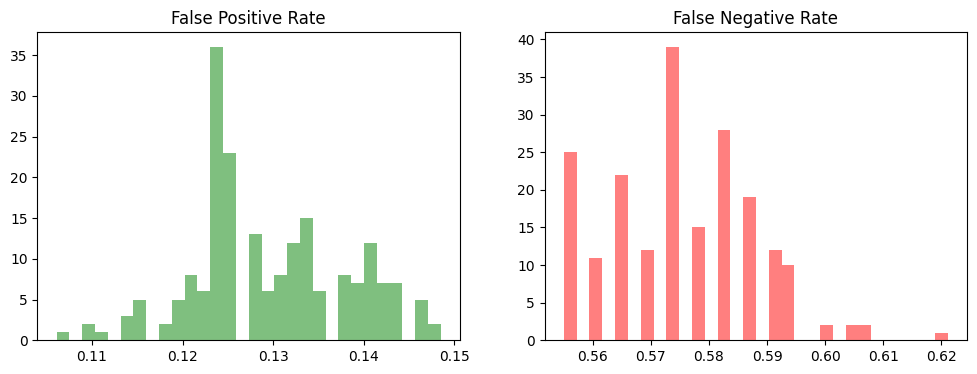

In [7]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.10998585573250348
Variance: 2.499729781256735e-05
Variance of estimate: 1.2498648906283675e-07
Standard error: 0.00035353428272635277
95% Confidence Interval:  [ 0.10929292853835983 ,  0.11067878292664714 ]
-----------------------------
Error type: FNR
Mean: 0.6040528634361233
Variance: 0.00010153037695219895
Variance of estimate: 5.076518847609947e-07
Standard error: 0.000712496936667797
95% Confidence Interval:  [ 0.6026563694402545 ,  0.6054493574319921 ]
-----------------------------


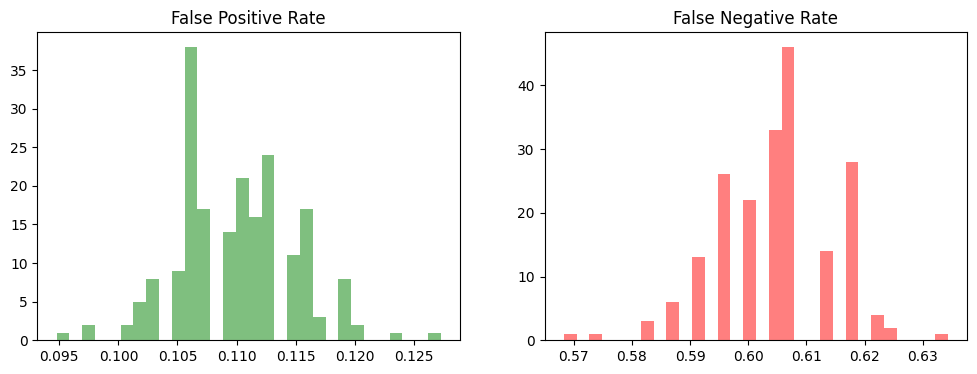

In [8]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.1160820367764851
Variance: 5.8419853797884156e-05
Variance of estimate: 2.920992689894208e-07
Standard error: 0.0005404620883923504
95% Confidence Interval:  [ 0.11502273108323609 ,  0.11714134246973411 ]
-----------------------------
Error type: FNR
Mean: 0.5914757709251102
Variance: 0.0002741252888674385
Variance of estimate: 1.3706264443371924e-06
Standard error: 0.0011707375642462288
95% Confidence Interval:  [ 0.5891811252991875 ,  0.5937704165510328 ]
-----------------------------


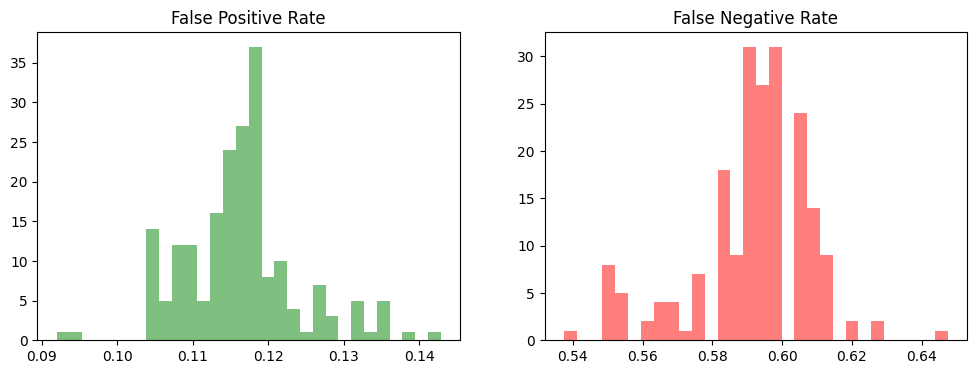

In [9]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.1387199434229137
Variance: 5.7282374654029986e-05
Variance of estimate: 2.8641187327014994e-07
Standard error: 0.0005351746194188864
95% Confidence Interval:  [ 0.13767100116885267 ,  0.1397688856769747 ]
-----------------------------
Error type: FNR
Mean: 0.5591409691629956
Variance: 0.00025490598015207516
Variance of estimate: 1.2745299007603758e-06
Standard error: 0.0011289507964301968
95% Confidence Interval:  [ 0.5569282256019924 ,  0.5613537127239988 ]
-----------------------------


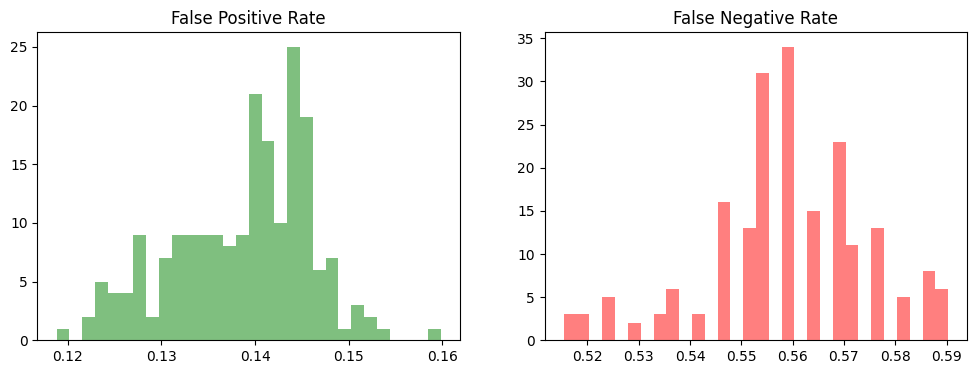

In [10]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

## Random Oversampling (ROS):

SRS Oversampling performance:

Error type: FPR
Mean: 0.12195190947666189
Variance: 4.9545817108123494e-05
Variance of estimate: 2.477290855406175e-07
Standard error: 0.0004977239049318582
95% Confidence Interval:  [ 0.12097637062299545 ,  0.12292744833032833 ]
-----------------------------
Error type: FNR
Mean: 0.5782378854625551
Variance: 0.00022804936596662996
Variance of estimate: 1.14024682983315e-06
Standard error: 0.001067823407606871
95% Confidence Interval:  [ 0.5761449515836455 ,  0.5803308193414646 ]
-----------------------------


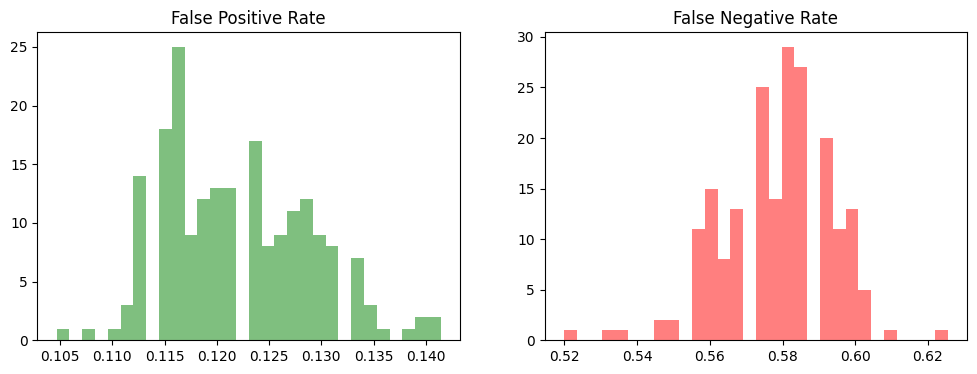

In [11]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.12037482319660534
Variance: 4.6494393065499785e-05
Variance of estimate: 2.3247196532749893e-07
Standard error: 0.000482153466572106
95% Confidence Interval:  [ 0.119429802402124 ,  0.12131984399108667 ]
-----------------------------
Error type: FNR
Mean: 0.5873348017621145
Variance: 0.00023930272566426207
Variance of estimate: 1.1965136283213103e-06
Standard error: 0.001093852653843885
95% Confidence Interval:  [ 0.5851908505605805 ,  0.5894787529636485 ]
-----------------------------


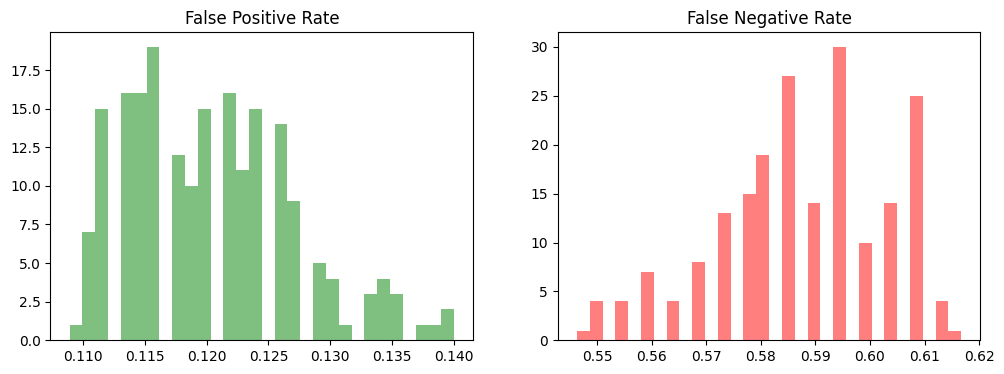

In [12]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [13]:
FPR = pd.DataFrame()

DF = FPR

DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.125884,0.113154,0.110325,0.147100,0.120226,0.121641,0.059406
1,0.124470,0.111740,0.115983,0.141443,0.131542,0.120226,0.067893
2,0.125884,0.113154,0.111740,0.127298,0.125884,0.118812,0.069307
3,0.125884,0.111740,0.113154,0.144272,0.121641,0.121641,0.057992
4,0.127298,0.113154,0.115983,0.132956,0.127298,0.123055,0.048091
...,...,...,...,...,...,...,...
195,0.131542,0.113154,0.120226,0.152758,0.115983,0.124470,NaN
196,0.120226,0.114569,0.118812,0.148515,0.120226,0.124470,NaN
197,0.142857,0.113154,0.121641,0.148515,0.115983,0.123055,NaN
198,0.124470,0.111740,0.127298,0.151344,0.113154,0.124470,NaN


<Axes: title={'center': 'FPR'}>

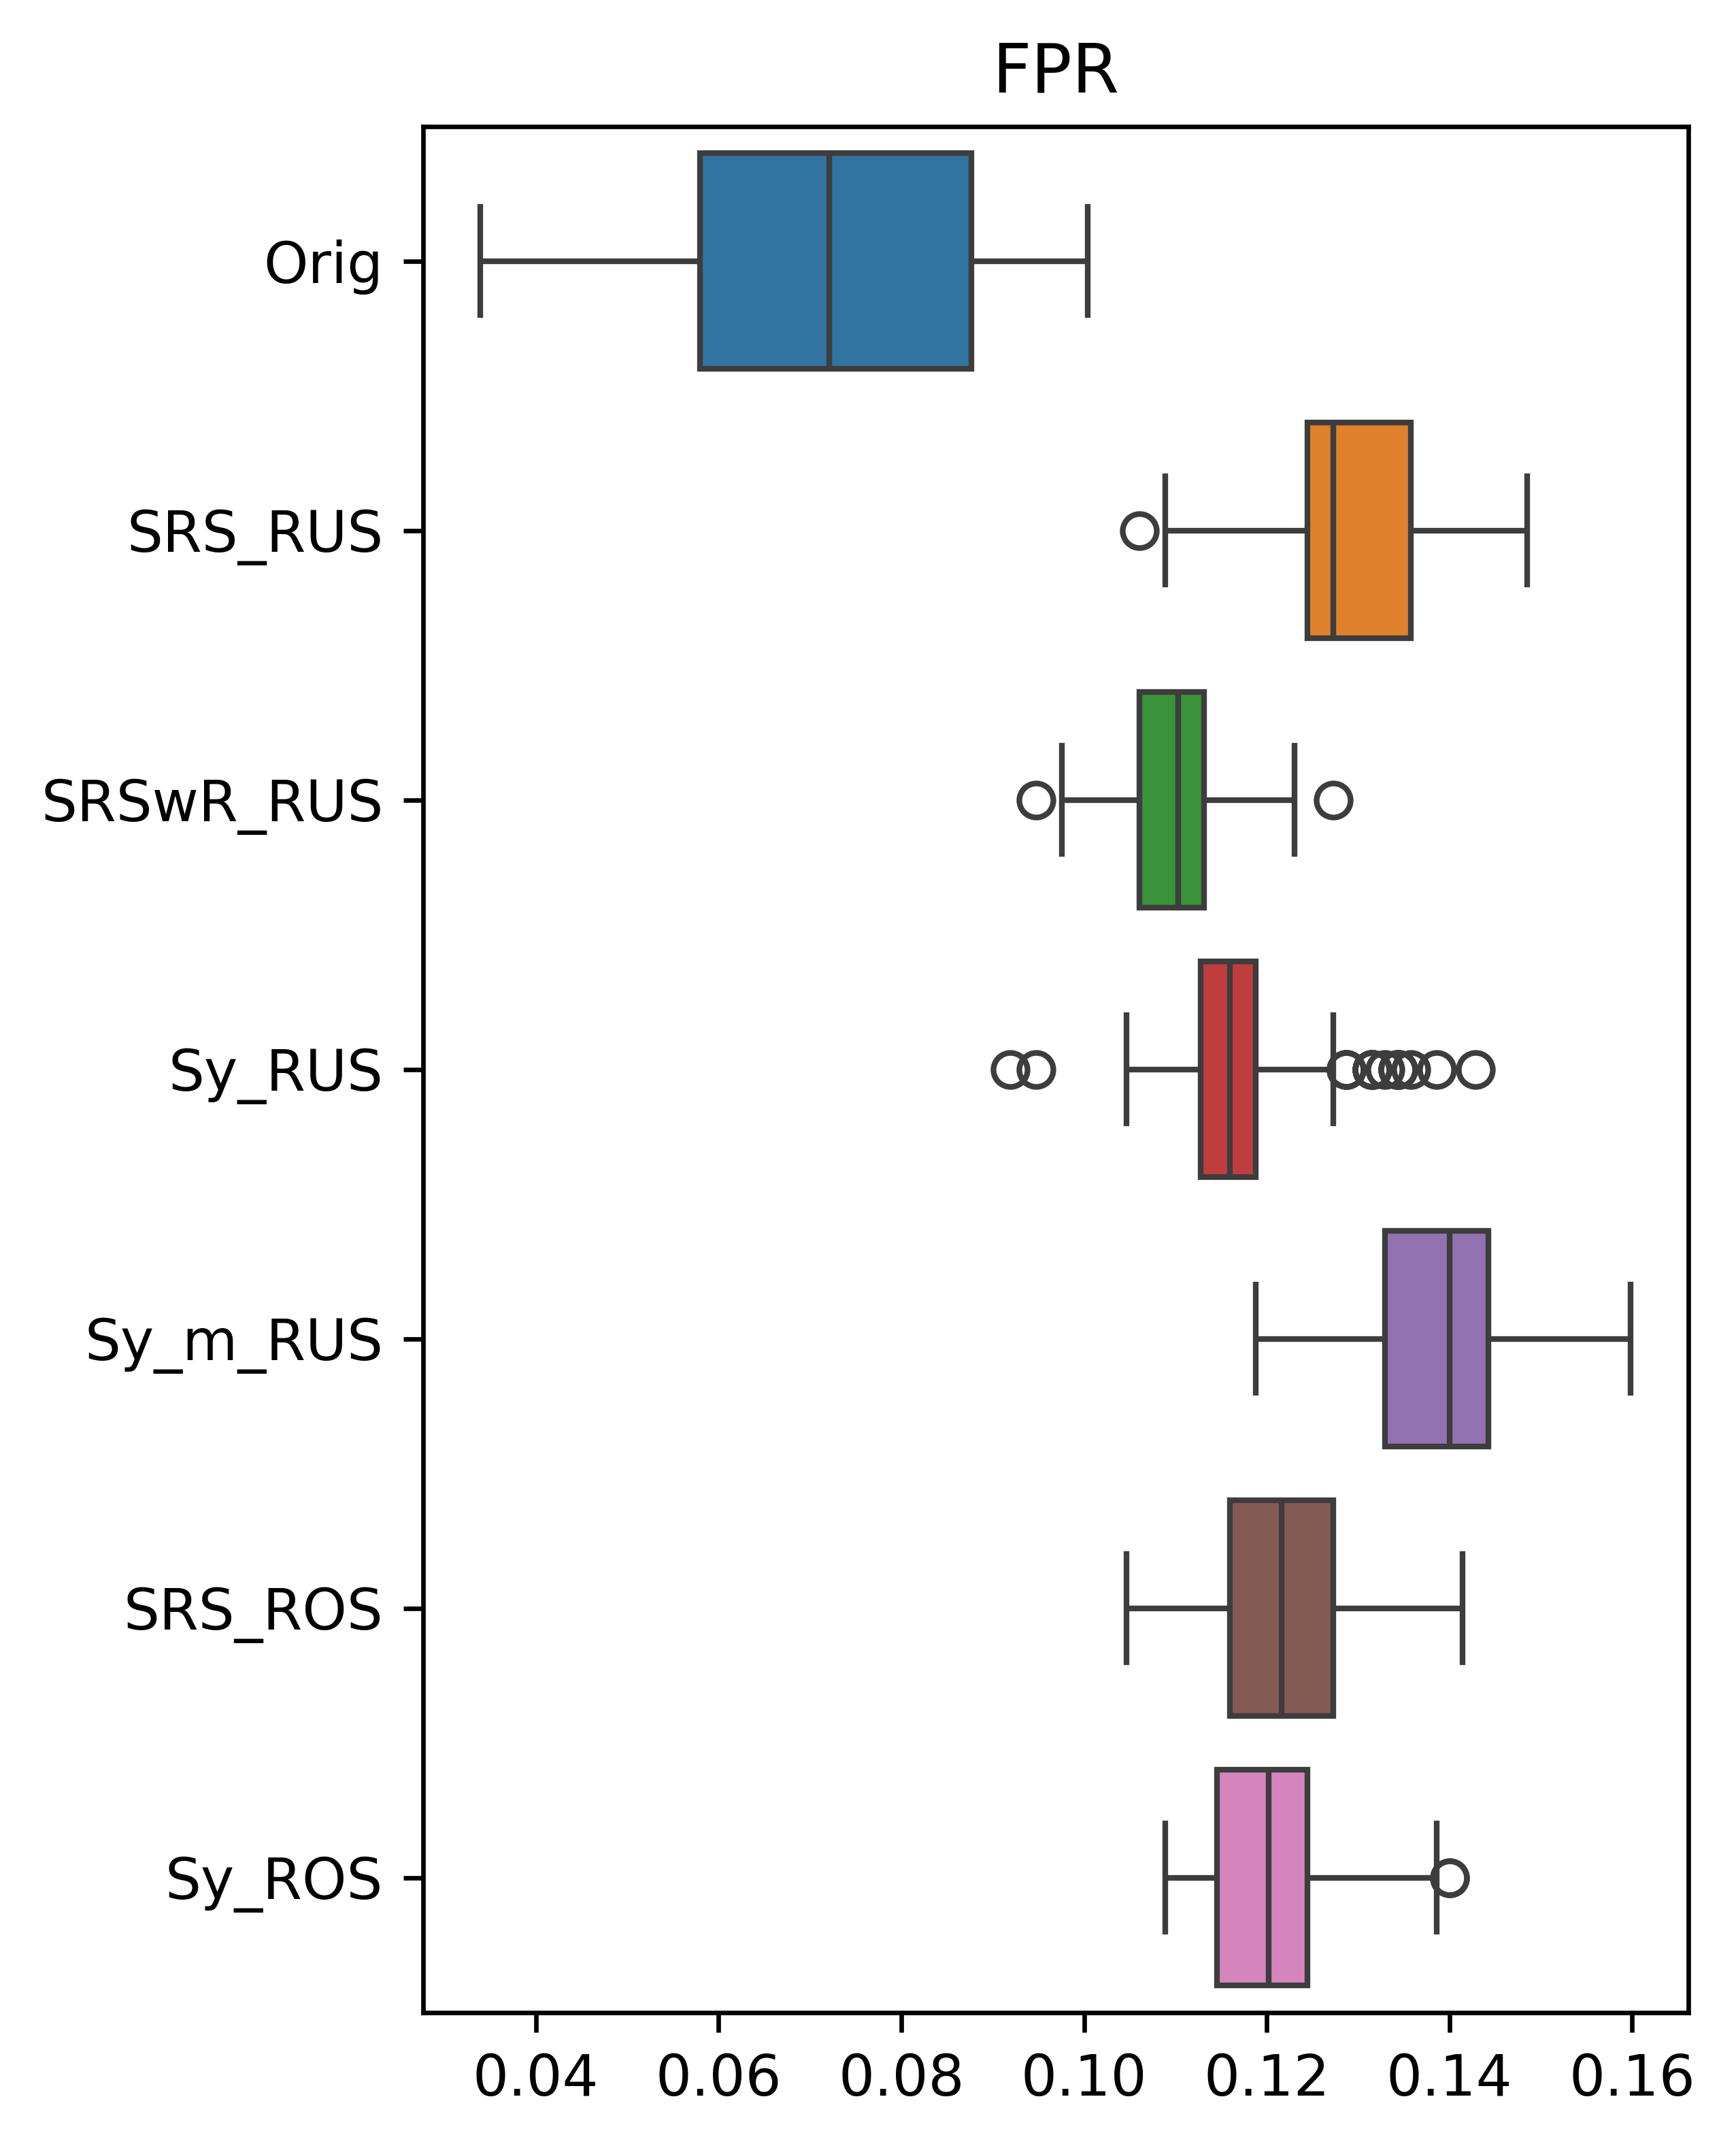

In [14]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [17]:
FNR = pd.DataFrame()

DF = FNR

DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.581498,0.594714,0.594714,0.546256,0.585903,0.572687,0.700441
1,0.585903,0.603524,0.581498,0.559471,0.555066,0.581498,0.687225
2,0.585903,0.599119,0.590308,0.590308,0.572687,0.585903,0.687225
3,0.581498,0.607930,0.590308,0.546256,0.585903,0.581498,0.704846
4,0.581498,0.599119,0.581498,0.585903,0.568282,0.572687,0.740088
...,...,...,...,...,...,...,...
195,0.590308,0.616740,0.594714,0.550661,0.590308,0.581498,NaN
196,0.599119,0.594714,0.594714,0.555066,0.581498,0.585903,NaN
197,0.572687,0.607930,0.594714,0.559471,0.585903,0.585903,NaN
198,0.590308,0.616740,0.590308,0.537445,0.603524,0.577093,NaN


<Axes: title={'center': 'FNR'}>

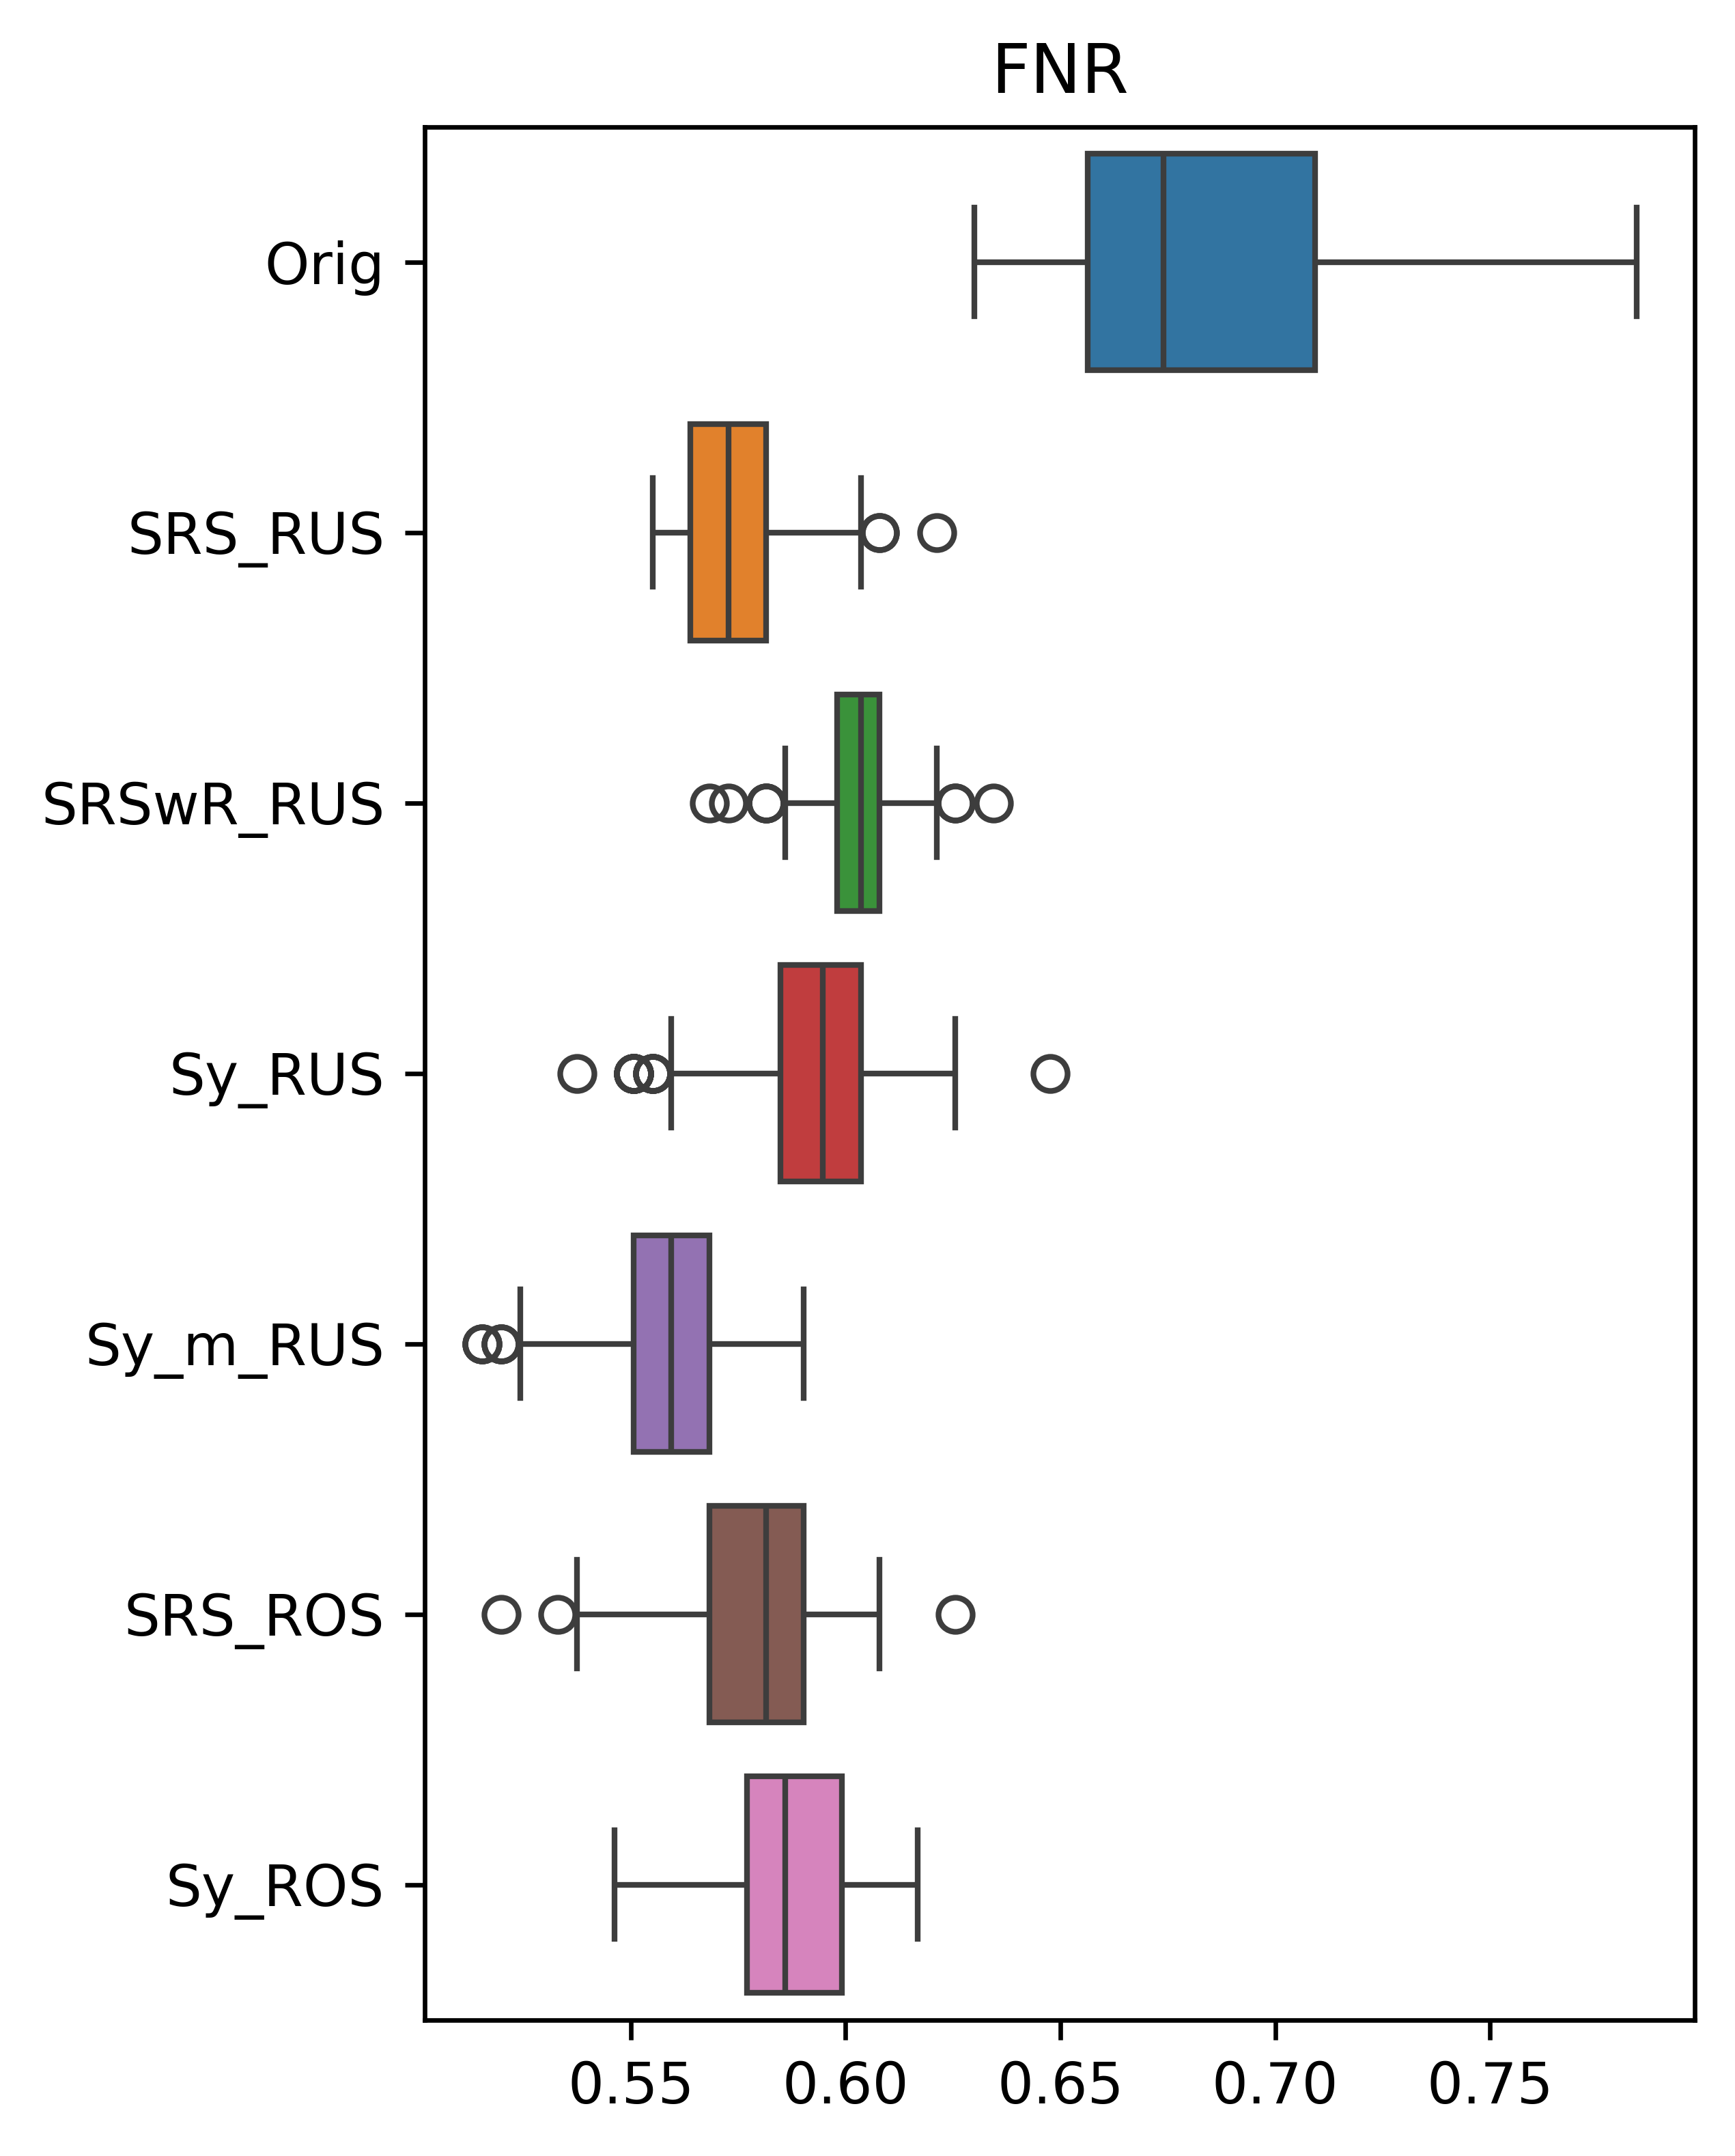

In [18]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## Transductive TL performance:

In [38]:
data_orig = pd.read_csv(path_to_data2 + "Credit_Imbalanced_Transductive.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2 + "Credit_SRS_RUS_Extension.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2 + "Credit_SRSwR_RUS_Extension.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2 + "Credit_Sy_RUS_Extension.csv", sep=",", header=0)
data_Sy2 = pd.read_csv(path_to_data2 + "Credit_Sy2_RUS_Extension.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2 + "Credit_SRS_ROS_Extension.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2 + "Credit_Sy_ROS_Extension.csv", sep=",", header=0)

data_SRS

,Unnamed: 0,Source time,FPR,TPR,FNR,TNR,Target time
0,0,14.256654,0.358272,0.641728,0.279743,0.720257,0.725009
1,1,11.590063,0.228662,0.771338,0.363344,0.636656,0.705707
2,2,10.458396,0.585880,0.414120,0.159164,0.840836,1.077954
3,3,11.073127,0.293203,0.706797,0.344051,0.655949,1.101564
4,4,9.190815,0.285827,0.714173,0.348875,0.651125,0.876115
...,...,...,...,...,...,...,...
95,45,15.380088,0.298472,0.701528,0.311897,0.688103,1.013469
96,46,15.129162,0.317176,0.682824,0.329582,0.670418,0.838733
97,47,16.092437,0.256586,0.743414,0.352090,0.647910,1.052903
98,48,14.078579,0.384615,0.615385,0.283762,0.716238,0.906443


Original (imbalanced) dataset:

In [39]:
print('SRS RUS', len(data_SRS))
print('SRSwR RUS', len(data_SRSwR))
print('Sy RUS', len(data_Sy))
print('Sym RUS', len(data_Sy2))
print('SRS ROS', len(data_SRS_ROS))
print('Sy ROS', len(data_Sy_ROS))



SRS RUS 100
SRSwR RUS 100
Sy RUS 100
Sym RUS 100
SRS ROS 100
Sy ROS 100


In [40]:
orig_FPR = data_orig['FPR']
orig_FNR = data_orig['FNR']
orig_time = data_orig['Source time']


Error type: FPR
Mean: 0.07596944151738667
Variance: 0.00011912648739393944
Variance of estimate: 2.3825297478787887e-06
Standard error: 0.0015435445402963884
95% Confidence Interval:  [ 0.07294409421840575 ,  0.0789947888163676 ]
-----------------------------
Error type: FNR
Mean: 0.5996945337620578
Variance: 0.001033861808285519
Variance of estimate: 2.0677236165710383e-05
Standard error: 0.004547222906974143
95% Confidence Interval:  [ 0.5907819768643885 ,  0.6086070906597272 ]
-----------------------------
Error type: Source time
Mean: 25.5948730745
Variance: 9.52669298067965
Variance of estimate: 0.190533859613593
Standard error: 0.43650184376883566
95% Confidence Interval:  [ 24.739329460713083 ,  26.450416688286918 ]
-----------------------------


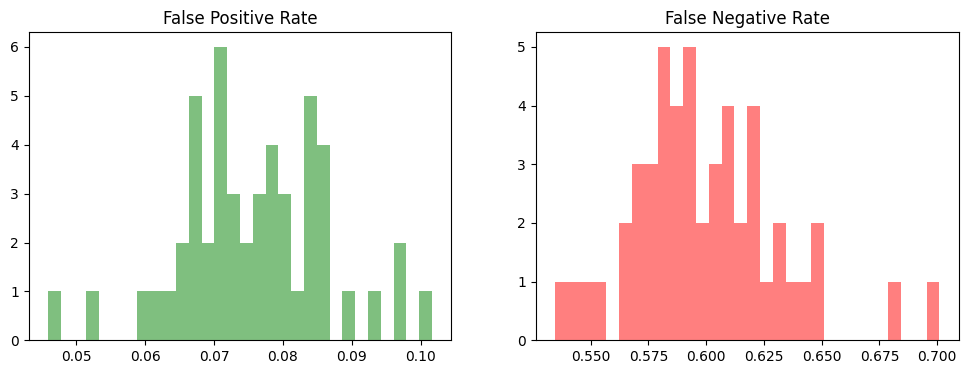

In [41]:
data = data_orig

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

##Random Undersampling (RUS):

SRS undersampling performance:

Error type: FPR
Mean: 0.332942571126491
Variance: 0.010004875328301972
Variance of estimate: 0.00010004875328301972
Standard error: 0.010002437367113063
95% Confidence Interval:  [ 0.3133377938869494 ,  0.35254734836603263 ]
-----------------------------
Error type: FNR
Mean: 0.31044212218427647
Variance: 0.004244279717205142
Variance of estimate: 4.244279717205142e-05
Standard error: 0.0065148136713225665
95% Confidence Interval:  [ 0.29767308738848425 ,  0.3232111569800687 ]
-----------------------------
Error type: Source time
Mean: 14.379363804140016
Variance: 3.031080547934287
Variance of estimate: 0.03031080547934287
Standard error: 0.17409998701706692
95% Confidence Interval:  [ 14.038127829586566 ,  14.720599778693467 ]
-----------------------------


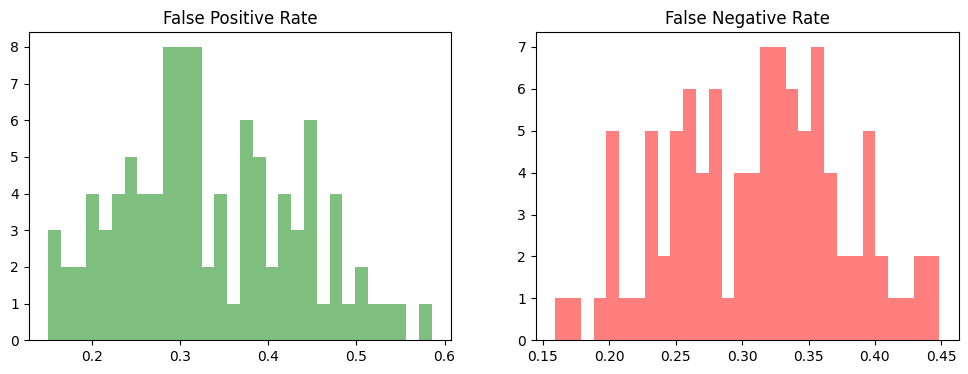

In [42]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']
SRS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

SRSwR Undersampling performance:

Error type: FPR
Mean: 0.33209694415381447
Variance: 0.013701300238933446
Variance of estimate: 0.00013701300238933446
Standard error: 0.011705255332086287
95% Confidence Interval:  [ 0.30915464370292534 ,  0.3550392446047036 ]
-----------------------------
Error type: FNR
Mean: 0.3112781350430546
Variance: 0.005966694045840013
Variance of estimate: 5.966694045840013e-05
Standard error: 0.007724437873295385
95% Confidence Interval:  [ 0.29613823681139567 ,  0.3264180332747136 ]
-----------------------------
Error type: Source time
Mean: 14.748137097459999
Variance: 4.009730883940468
Variance of estimate: 0.040097308839404676
Standard error: 0.20024312432491828
95% Confidence Interval:  [ 14.35566057378316 ,  15.140613621136838 ]
-----------------------------


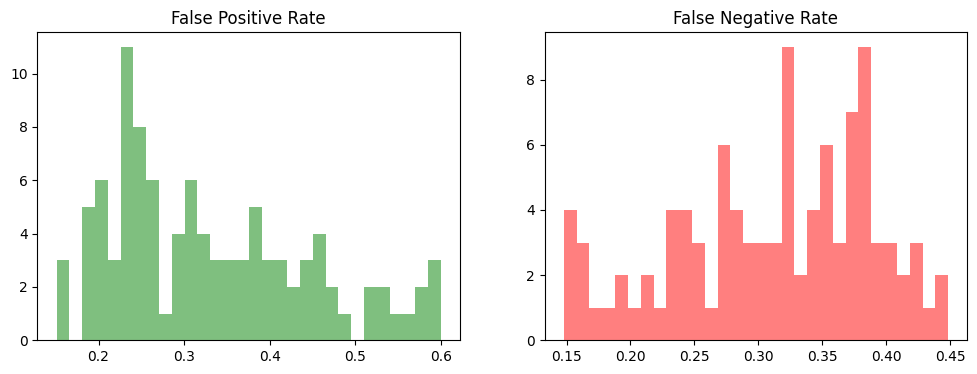

In [43]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']
SRSwR_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.3092571127454267
Variance: 0.00877489623959628
Variance of estimate: 8.77489623959628e-05
Standard error: 0.00936744161422759
95% Confidence Interval:  [ 0.29089692718154064 ,  0.3276172983093128 ]
-----------------------------
Error type: FNR
Mean: 0.3231913183287138
Variance: 0.003864747481594507
Variance of estimate: 3.864747481594507e-05
Standard error: 0.006216709323745568
95% Confidence Interval:  [ 0.3110065680541725 ,  0.3353760686032551 ]
-----------------------------
Error type: Source time
Mean: 14.779903764109969
Variance: 1.8140802841267643
Variance of estimate: 0.018140802841267643
Standard error: 0.1346877976702702
95% Confidence Interval:  [ 14.51591568067624 ,  15.043891847543698 ]
-----------------------------


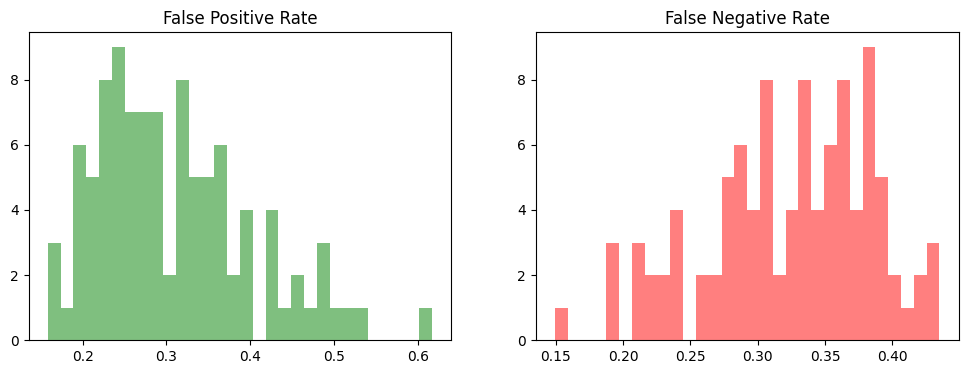

In [44]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']
Sy_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Multiple Systematic Undersampling performance:

In [45]:
data_Sy2

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,18.672592,0.284773,0.715227,0.336817,0.663183,0.667803
1,1,14.602922,0.461012,0.538988,0.230707,0.769293,1.287971
2,2,9.910971,0.336143,0.663857,0.307074,0.692926,0.971497
3,3,14.199039,0.311117,0.688883,0.323955,0.676045,0.705826
4,4,13.106042,0.211538,0.788462,0.397910,0.602090,0.729243
...,...,...,...,...,...,...,...
95,45,17.173068,0.254215,0.745785,0.368167,0.631833,0.874991
96,46,14.934788,0.262908,0.737092,0.362540,0.637460,1.072429
97,47,16.540229,0.252371,0.747629,0.361736,0.638264,1.063900
98,48,15.292147,0.267387,0.732613,0.360129,0.639871,1.300579


Error type: FPR
Mean: 0.3114805057927292
Variance: 0.007480172947418874
Variance of estimate: 7.480172947418874e-05
Standard error: 0.008648799308238616
95% Confidence Interval:  [ 0.2945288591485815 ,  0.32843215243687685 ]
-----------------------------
Error type: FNR
Mean: 0.32771704180115757
Variance: 0.003127211467131281
Variance of estimate: 3.127211467131281e-05
Standard error: 0.005592147590265551
95% Confidence Interval:  [ 0.3167564325242371 ,  0.33867765107807807 ]
-----------------------------
Error type: Source time
Mean: 14.758300149490005
Variance: 2.566926255786859
Variance of estimate: 0.02566926255786859
Standard error: 0.16021629928901926
95% Confidence Interval:  [ 14.444276202883527 ,  15.072324096096482 ]
-----------------------------


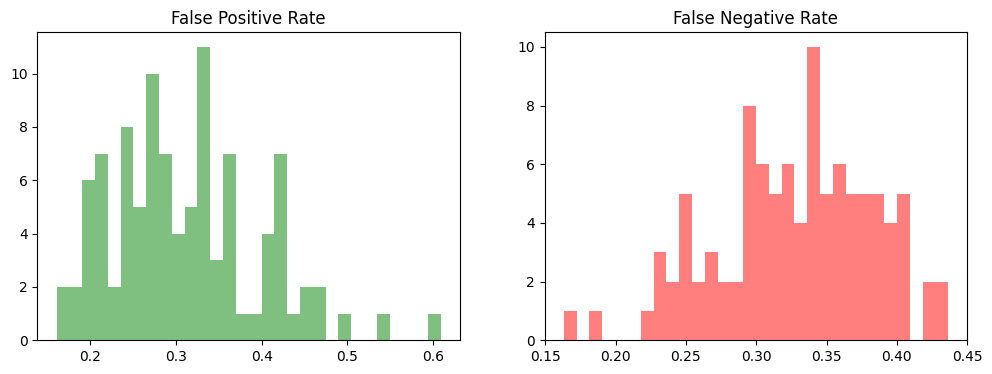

In [46]:
data = data_Sy2

Sy2_FPR = data['FPR']
Sy2_FNR = data['FNR']
Sy2_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

## Random Oversampling (ROS):

SRS Oversampling performance:

In [47]:
data_SRS_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,29.519282,0.356691,0.643309,0.286174,0.713826,0.815246
1,1,26.297130,0.430453,0.569547,0.227492,0.772508,0.732226
2,2,27.776567,0.197576,0.802424,0.389871,0.610129,0.671817
3,3,36.138069,0.293994,0.706006,0.319936,0.680064,0.765320
4,4,29.746683,0.344310,0.655690,0.281350,0.718650,1.265848
...,...,...,...,...,...,...,...
95,45,55.214404,0.255796,0.744204,0.352090,0.647910,1.100275
96,46,51.242027,0.440464,0.559536,0.243569,0.756431,1.435846
97,47,63.405175,0.253952,0.746048,0.346463,0.653537,0.945727
98,48,49.539949,0.229189,0.770811,0.372990,0.627010,1.269417


Error type: FPR
Mean: 0.3437328767180189
Variance: 0.009906458052727937
Variance of estimate: 9.906458052727936e-05
Standard error: 0.009953119135591585
95% Confidence Interval:  [ 0.3242247632122594 ,  0.36324099022377837 ]
-----------------------------
Error type: FNR
Mean: 0.2902491961390353
Variance: 0.0037418656620052484
Variance of estimate: 3.7418656620052486e-05
Standard error: 0.00611707909218546
95% Confidence Interval:  [ 0.27825972111835184 ,  0.3022386711597188 ]
-----------------------------
Error type: Source time
Mean: 43.219802701969996
Variance: 52.5276140390241
Variance of estimate: 0.5252761403902411
Standard error: 0.7247593672318013
95% Confidence Interval:  [ 41.799274342195666 ,  44.64033106174433 ]
-----------------------------


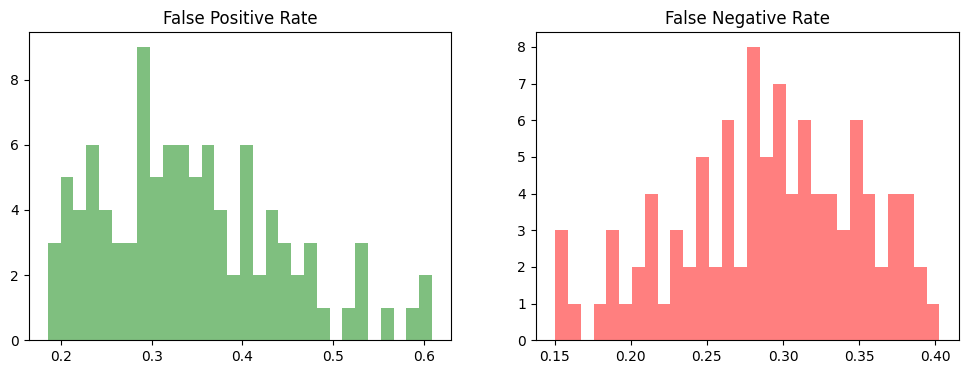

In [48]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']
SRS_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

Systematic Resampling performance:

In [49]:
data_Sy_ROS

,Unnamed: 0,Source time,FPR,TNR,FNR,TPR,Target time
0,0,36.825429,0.392518,0.607482,0.267685,0.732315,0.704088
1,1,30.849988,0.257376,0.742624,0.340836,0.659164,0.739149
2,2,34.695637,0.391201,0.608799,0.251608,0.748392,0.756987
3,3,30.753816,0.272392,0.727608,0.329582,0.670418,0.722004
4,4,29.860213,0.258693,0.741307,0.334405,0.665595,0.685640
...,...,...,...,...,...,...,...
95,45,48.790930,0.239199,0.760801,0.358521,0.641479,1.179479
96,46,46.742840,0.248419,0.751581,0.359325,0.640675,2.070498
97,47,50.793663,0.391201,0.608799,0.245981,0.754019,1.128319
98,48,50.061107,0.273973,0.726027,0.336817,0.663183,1.300923


Error type: FPR
Mean: 0.32615121180141193
Variance: 0.011322588094206366
Variance of estimate: 0.00011322588094206367
Standard error: 0.01064076505435881
95% Confidence Interval:  [ 0.30529531229486867 ,  0.3470071113079552 ]
-----------------------------
Error type: FNR
Mean: 0.30090032153209
Variance: 0.004347633132903288
Variance of estimate: 4.347633132903288e-05
Standard error: 0.006593658417679284
95% Confidence Interval:  [ 0.2879767510334386 ,  0.3138238920307414 ]
-----------------------------
Error type: Source time
Mean: 42.324838400399955
Variance: 49.64442739327312
Variance of estimate: 0.4964442739327312
Standard error: 0.7045880171651596
95% Confidence Interval:  [ 40.94384588675624 ,  43.705830914043666 ]
-----------------------------


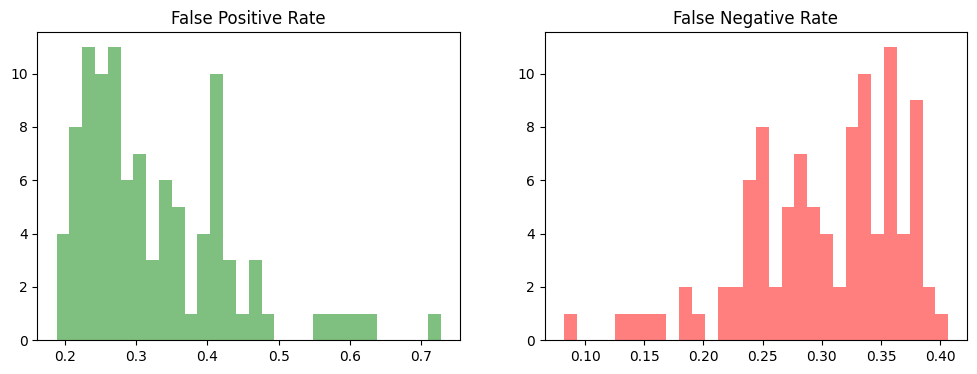

In [50]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']
Sy_ROS_time = data['Source time']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')
perf_metrics(data, 'Source time')

In [51]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sy2_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.358272,0.314278,0.240253,0.284773,0.356691,0.392518,0.071128
1,0.228662,0.424658,0.353530,0.461012,0.430453,0.257376,0.069810
2,0.585880,0.310327,0.451791,0.336143,0.197576,0.391201,0.066386
3,0.293203,0.539779,0.196523,0.311117,0.293994,0.272392,0.084299
4,0.285827,0.457850,0.237355,0.211538,0.344310,0.258693,0.081138
...,...,...,...,...,...,...,...
95,0.298472,0.258430,0.335353,0.254215,0.255796,0.239199,NaN
96,0.317176,0.535564,0.399895,0.262908,0.440464,0.248419,NaN
97,0.256586,0.246048,0.274236,0.252371,0.253952,0.391201,NaN
98,0.384615,0.358272,0.196259,0.267387,0.229189,0.273973,NaN


<Axes: title={'center': 'FPR'}>

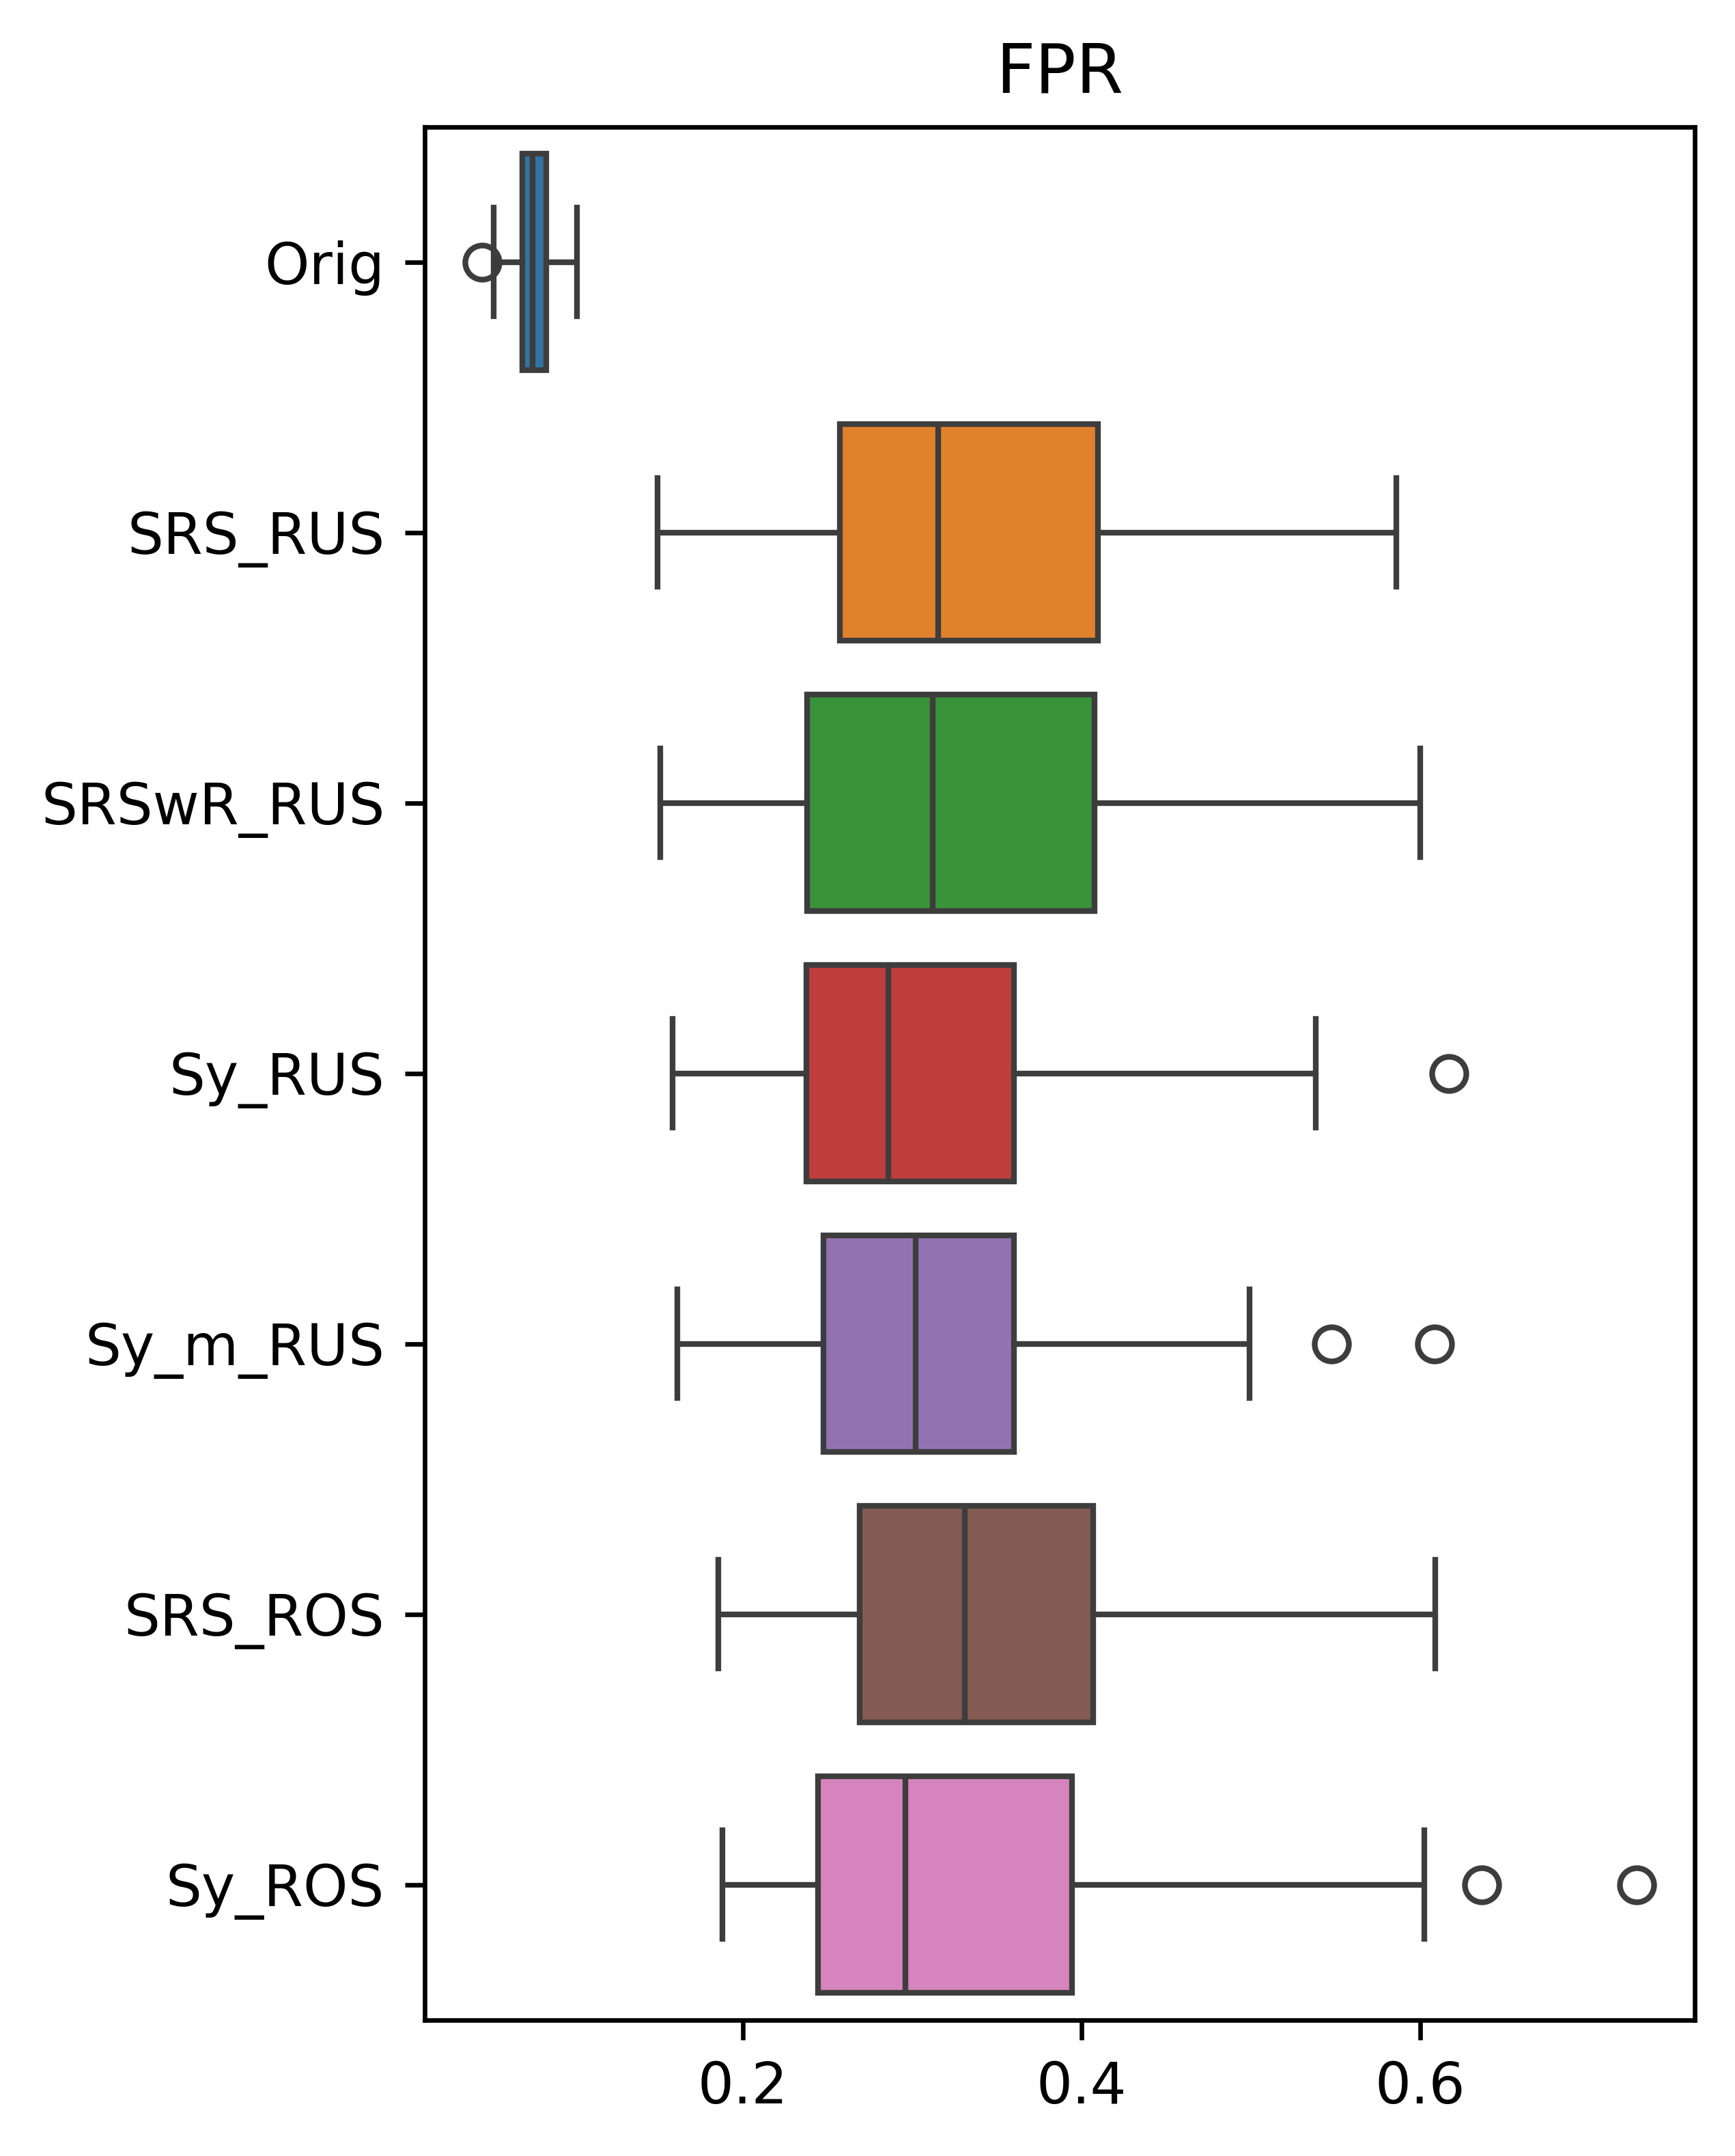

In [33]:
dataset = FPR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [34]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sy2_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.279743,0.303859,0.365756,0.336817,0.286174,0.267685,0.616559
1,0.363344,0.245177,0.285370,0.230707,0.227492,0.340836,0.611736
2,0.159164,0.319936,0.230707,0.307074,0.389871,0.251608,0.629421
3,0.344051,0.162379,0.405949,0.323955,0.319936,0.329582,0.565916
4,0.348875,0.240354,0.372990,0.397910,0.281350,0.334405,0.585209
...,...,...,...,...,...,...,...
95,0.311897,0.373794,0.294212,0.368167,0.352090,0.358521,NaN
96,0.329582,0.194534,0.271704,0.362540,0.243569,0.359325,NaN
97,0.352090,0.352090,0.352090,0.361736,0.346463,0.245981,NaN
98,0.283762,0.289389,0.404341,0.360129,0.372990,0.336817,NaN


<Axes: title={'center': 'FNR'}>

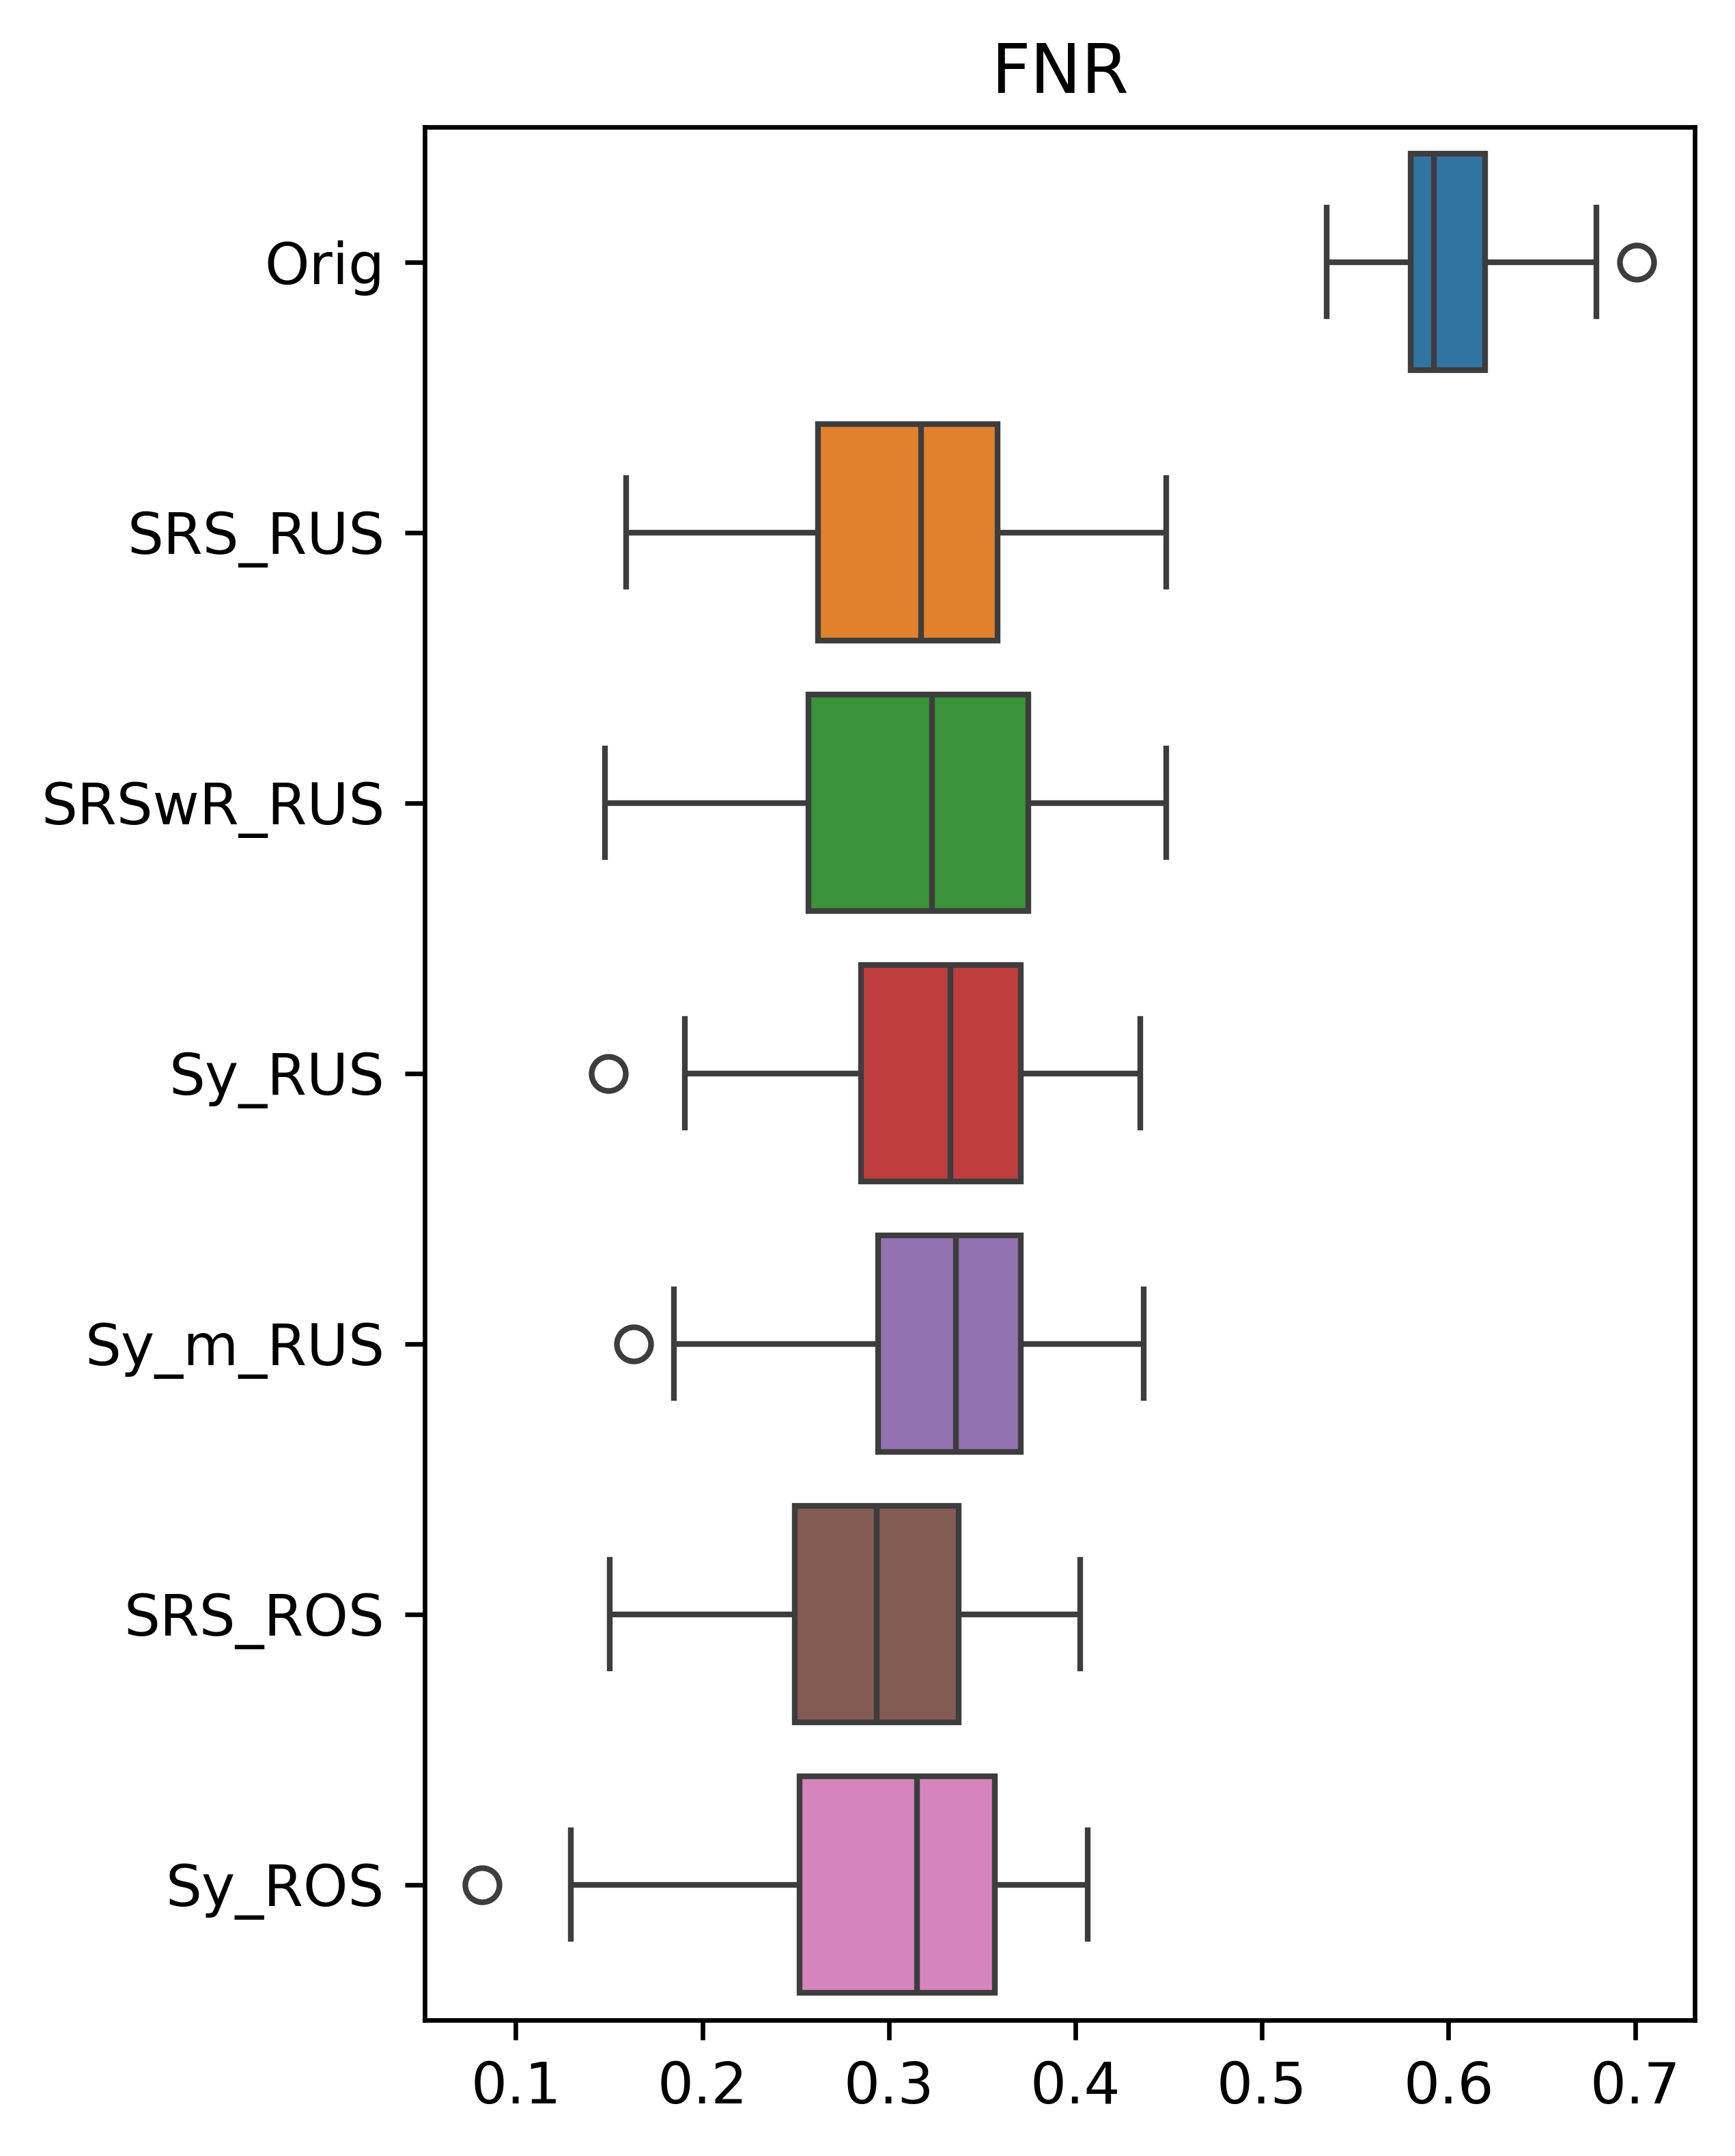

In [35]:
dataset = FNR

plt.figure(figsize=(4,6), dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [36]:
Time = pd.DataFrame()

DF = Time


DF['SRS_RUS'] = SRS_time
DF['SRSwR_RUS'] = SRSwR_time
DF['Sy_RUS'] = Sy_time
DF['Sy_m_RUS'] = Sy2_time
DF['SRS_ROS'] = SRS_ROS_time
DF['Sy_ROS'] = Sy_ROS_time
DF['Orig'] = orig_time
DF

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,14.256654,13.535000,13.774332,18.672592,29.519282,36.825429,39.027034
1,11.590063,12.154400,13.753514,14.602922,26.297130,30.849988,23.658011
2,10.458396,12.060230,12.262604,9.910971,27.776567,34.695637,22.193098
3,11.073127,12.974432,14.749483,14.199039,36.138069,30.753816,21.648344
4,9.190815,12.710656,13.935628,13.106042,29.746683,29.860213,20.292255
...,...,...,...,...,...,...,...
95,15.380088,16.608903,15.832477,17.173068,55.214404,48.790930,NaN
96,15.129162,15.548482,16.718465,14.934788,51.242027,46.742840,NaN
97,16.092437,16.419009,16.411000,16.540229,63.405175,50.793663,NaN
98,14.078579,15.641346,16.064714,15.292147,49.539949,50.061107,NaN


<Axes: title={'center': 'Training Time'}>

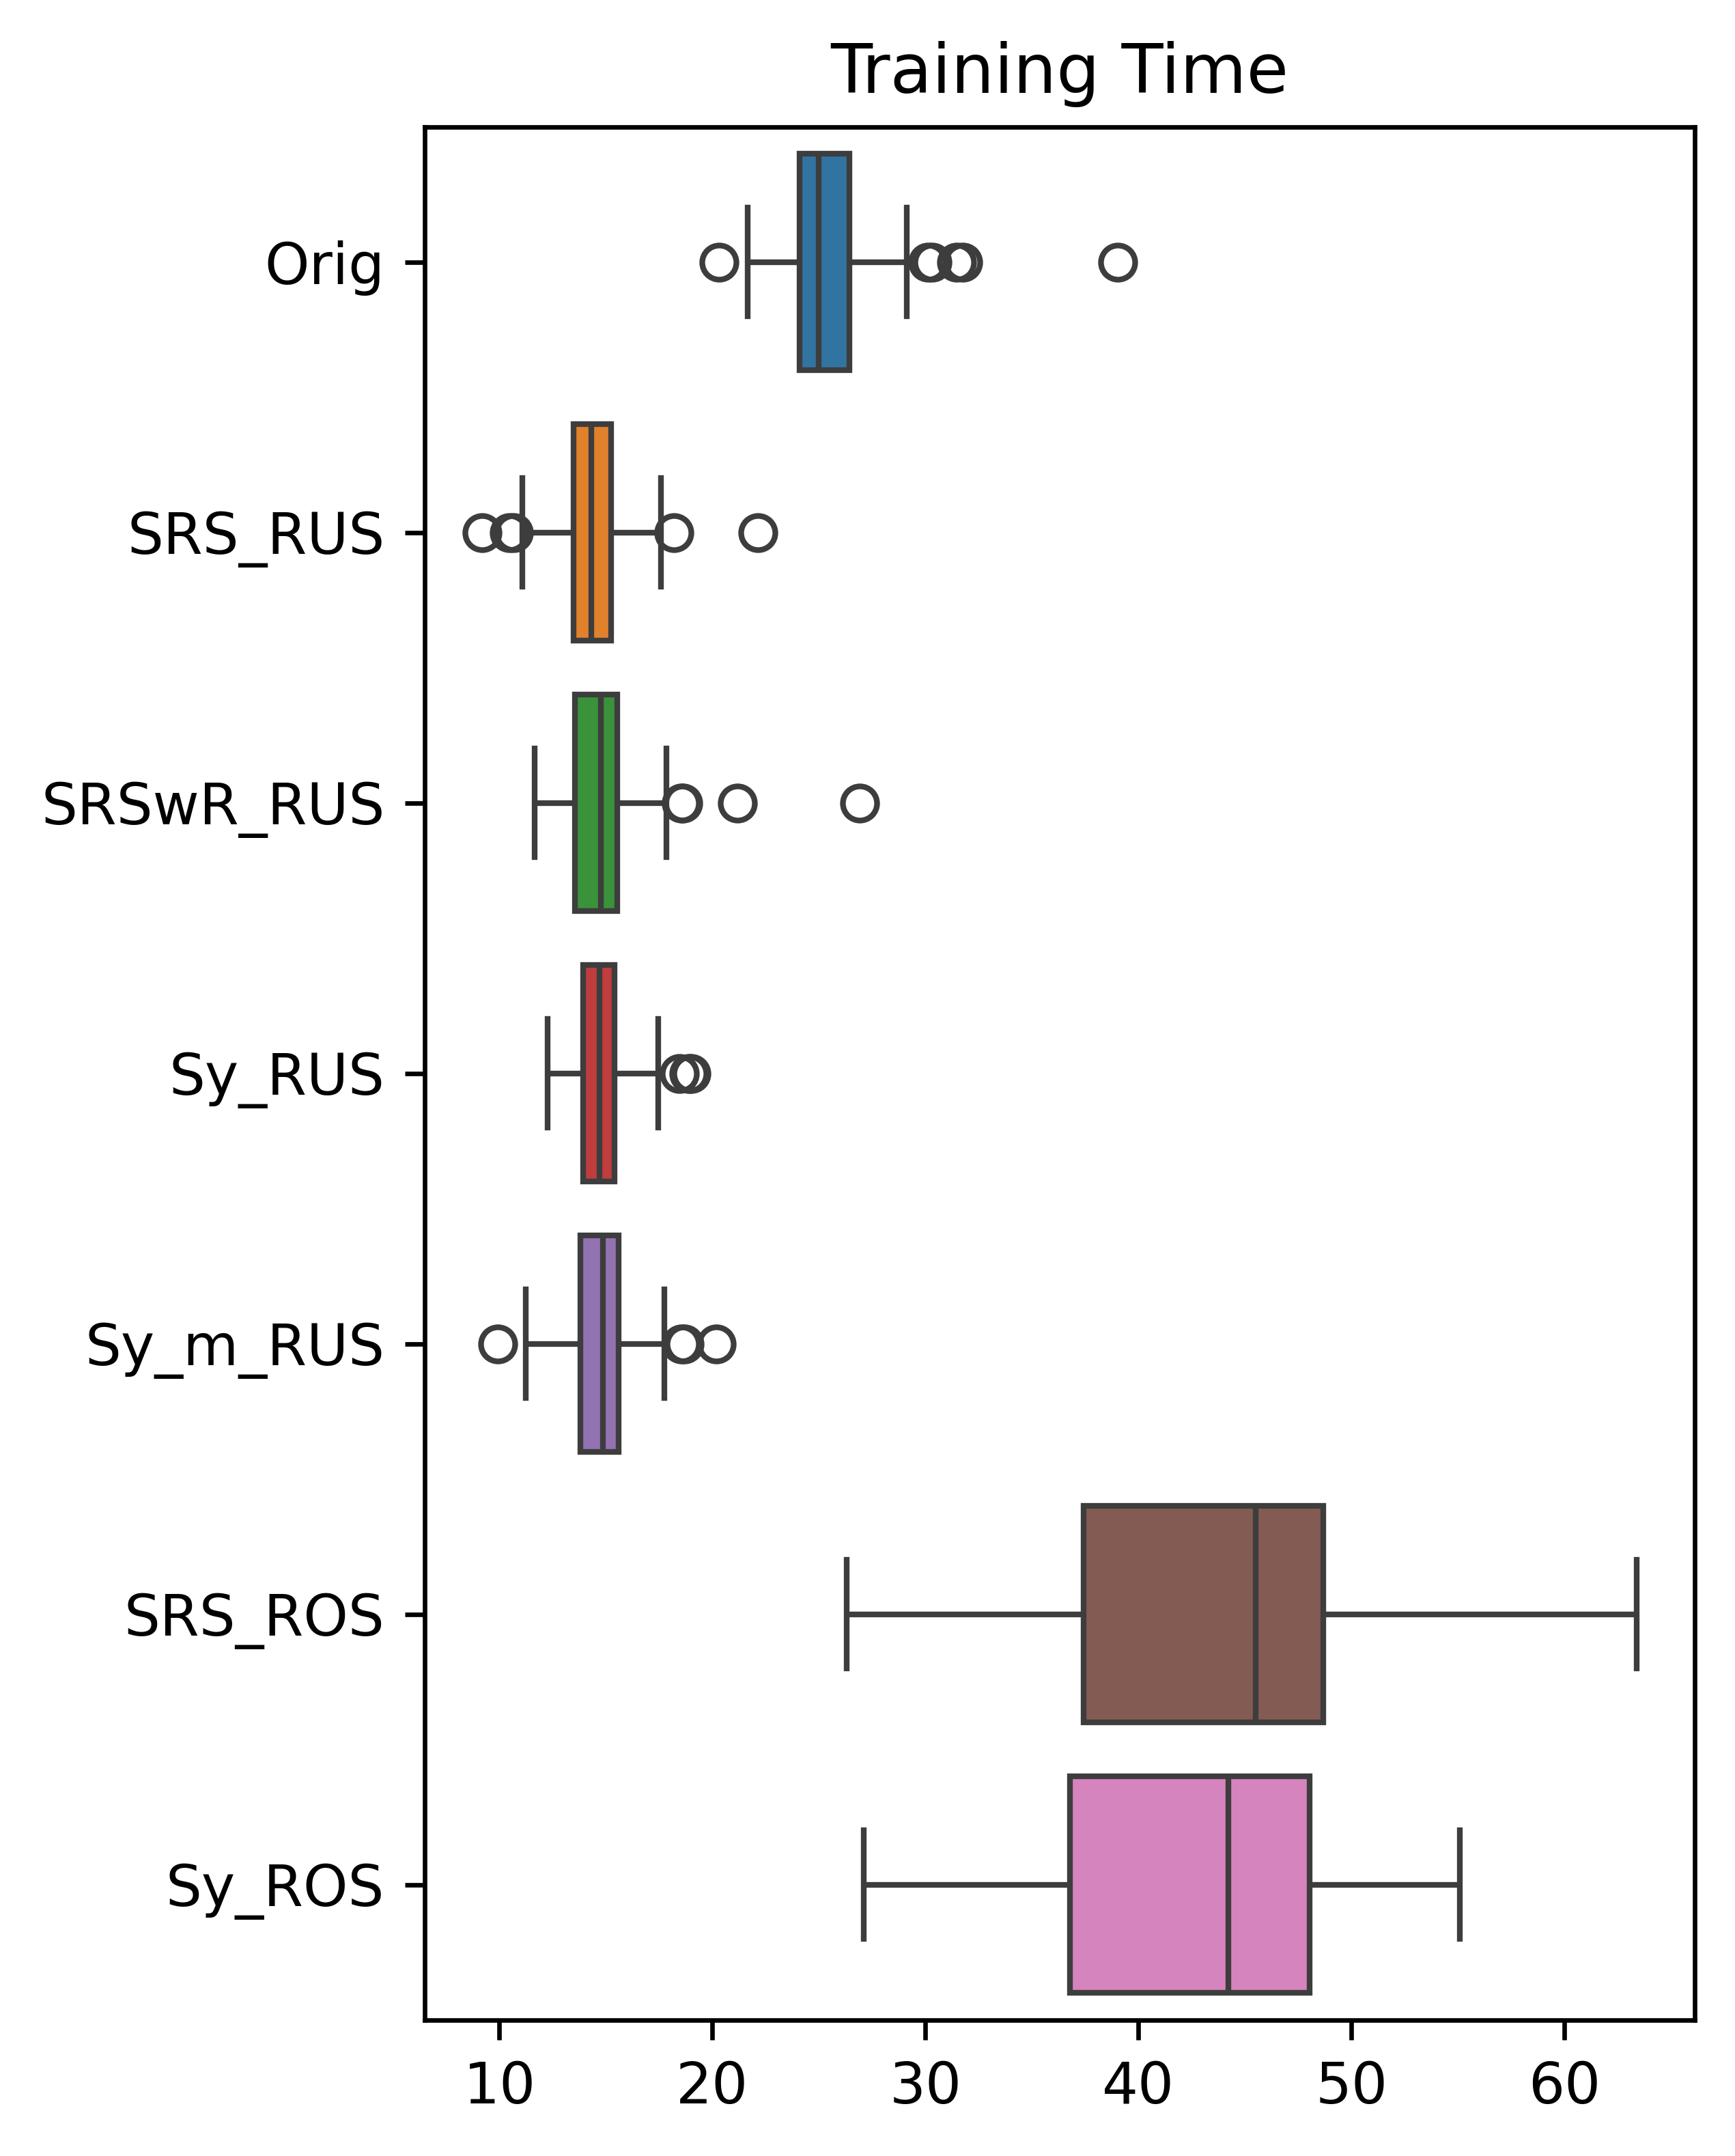

In [37]:
dataset = DF

plt.figure(figsize=(4,6), dpi=600)
plt.title('Training Time')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')